In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import re
import os
%matplotlib inline

In [2]:
df = pd.read_csv("Datafiniti_Womens_Shoes.csv")

In [3]:
df = df[df["prices.amountMax"] < 250]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9995 non-null   object 
 1   dateAdded            9995 non-null   object 
 2   dateUpdated          9995 non-null   object 
 3   asins                3 non-null      object 
 4   brand                9995 non-null   object 
 5   categories           9995 non-null   object 
 6   primaryCategories    9995 non-null   object 
 7   colors               2626 non-null   object 
 8   dimension            117 non-null    object 
 9   ean                  671 non-null    float64
 10  imageURLs            9995 non-null   object 
 11  keys                 9995 non-null   object 
 12  manufacturer         527 non-null    object 
 13  manufacturerNumber   2482 non-null   object 
 14  name                 9995 non-null   object 
 15  prices.amountMax     9995 non-null   f

In [5]:
df.head().T

,0,1,2,3,4
id,AVpfEf_hLJeJML431ueH,AVpi74XfLJeJML43qZAc,AVpi74XfLJeJML43qZAc,AVpjXyCc1cnluZ0-V-Gj,AVphGKLPilAPnD_x1Nrm
dateAdded,2015-05-04T12:13:08Z,2017-01-27T01:23:39Z,2017-01-27T01:23:39Z,2017-01-27T01:25:56Z,2017-01-27T01:25:56Z
dateUpdated,2018-01-29T04:38:43Z,2018-01-03T05:21:54Z,2018-01-03T05:21:54Z,2018-01-04T11:52:35Z,2018-01-18T03:55:18Z
asins,NaN,NaN,NaN,NaN,NaN
brand,Naturalizer,MUK LUKS,MUK LUKS,MUK LUKS,MUK LUKS
categories,"Clothing,Shoes,Women's Shoes,All Women's Shoes...","Clothing,Shoes,Women's Shoes,Women's Casual Sh...","Clothing,Shoes,Women's Shoes,Women's Casual Sh...","Clothing,Shoes,Women's Shoes,All Women's Shoes...","Clothing,Shoes,Women's Shoes,All Women's Shoes..."
primaryCategories,Shoes,Shoes,Shoes,"Shoes,Shoes",Shoes
colors,"Silver,Cream Watercolor Floral",Grey,Grey,Black,Grey
dimension,NaN,NaN,NaN,6.0 in x 6.0 in x 1.0 in,6.0 in x 6.0 in x 1.0 in
ean,NaN,33977045743.0,33977045743.0,33977045903.0,33977045958.0


In [6]:
df.colors.fillna(df["prices.color"], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9995 non-null   object 
 1   dateAdded            9995 non-null   object 
 2   dateUpdated          9995 non-null   object 
 3   asins                3 non-null      object 
 4   brand                9995 non-null   object 
 5   categories           9995 non-null   object 
 6   primaryCategories    9995 non-null   object 
 7   colors               9995 non-null   object 
 8   dimension            117 non-null    object 
 9   ean                  671 non-null    float64
 10  imageURLs            9995 non-null   object 
 11  keys                 9995 non-null   object 
 12  manufacturer         527 non-null    object 
 13  manufacturerNumber   2482 non-null   object 
 14  name                 9995 non-null   object 
 15  prices.amountMax     9995 non-null   f

In [8]:
#df["colors"] = df['colors'].str.split(',')
#df = df.explode('colors').reset_index(drop=True)

In [9]:
df["color"] = df["prices.color"].str.lower()

In [10]:
df[df['color'].str.contains("gold", na=False)]["color"].unique()

array(['black rose gold', 'black gold', 'rose gold', 'gold', 'rosegold',
       'soft gold', 'gold snake', 'rose gold glitter', 'rose gold brown',
       'washed gold', 'metal gold', 'black gold combo', 'gold metallic',
       'brindle/inca gold'], dtype=object)

In [11]:
df.color.value_counts().head(50)

black           1962
gray             737
taupe            558
navy             535
brown            301
nude             225
white            221
blue             177
stone            168
tan              167
pewter           157
red              145
black white      126
chestnut         109
mushroom         104
olive             96
dark tan          95
silver            89
gold              76
cognac            72
wine              72
pink              69
black fabric      69
natural           65
black micro       63
slate             63
blush             61
dark gray         61
sand              55
whiskey           53
black patent      53
dark brown        51
burgundy          49
stucco            49
bone              49
black gray        49
white sand        47
white black       47
lux navy          43
camel             41
navy fabric       40
black combo       39
black snake       37
dark red          35
gray pink         34
navy velvet       33
charcoal          31
denim        

In [12]:
df.color.value_counts()

black                                1962
gray                                  737
taupe                                 558
navy                                  535
brown                                 301
                                     ... 
black/white/dark grey/wolf grey         1
neon pink/black/white                   1
poseidon/vintage indigo                 1
steel/apollo gray/metallic silver       1
mahogany rose suede                     1
Name: color, Length: 541, dtype: int64

In [13]:
# Spell Check for Gray
df["color"].replace(df[df['color'].str.contains("grey",na=False)]["color"].unique(), "gray", inplace=True)

In [14]:
for n in df.color.value_counts().head(50).index:
    df["color"].replace(df[df['color'].str.startswith(n,na=False)]["color"].unique(), n, inplace=True)

In [15]:
df.color.value_counts().head(50)

black                  2826
gray                   1070
navy                    741
taupe                   573
white                   430
brown                   332
nude                    231
blue                    221
stone                   185
tan                     174
pewter                  166
red                     164
silver                  128
pink                    109
chestnut                109
mushroom                104
olive                    96
dark tan                 95
wine                     89
cognac                   84
gold                     83
natural                  70
blush                    68
slate                    66
dark gray                61
stucco                   57
sand                     55
burgundy                 54
whiskey                  53
dark brown               51
charcoal                 50
bone                     49
lux navy                 43
camel                    41
dark red                 35
denim               

In [16]:
for n in df.color.value_counts().head(12).index:
    df["color"].replace(df[df['color'].str.startswith(n,na=False)]["color"].unique(), n, inplace=True)
for n in df.color.value_counts().head(12).index:
    df["color"].replace(df[df['color'].str.contains(n,na=False)]["color"].unique(), n, inplace=True)
df.color.value_counts().head(50)

black            2885
gray             1179
navy              850
taupe             577
white             451
brown             414
blue              322
tan               279
nude              231
red               213
stone             189
pewter            166
silver            128
pink              109
chestnut          109
mushroom          104
olive              96
wine               89
cognac             84
gold               83
natural            70
blush              68
slate              66
stucco             57
sand               55
burgundy           54
whiskey            53
charcoal           50
bone               49
camel              41
chocolate          31
denim              31
raspberry          27
purple             26
army               24
bronze             23
soft gold          23
rosegold           22
midnight           21
rose gold          21
beige              19
green              18
merlot velvet      17
metallic           17
turquoise          16
snake     

In [17]:
commonCenterColors = ["navy","pink","gold","green","silver","chocolate","velvet","pewter","purple","bronze","nude","bone","rose","wine"]

In [18]:
for n in commonCenterColors:
    df["color"].replace(df[df['color'].str.startswith(n,na=False)]["color"].unique(), n, inplace=True)

for n in commonCenterColors:
    df["color"].replace(df[df['color'].str.contains(n,na=False)]["color"].unique(), n, inplace=True)
df.color.value_counts().head(50)

black        2885
gray         1179
navy          850
taupe         577
white         451
brown         414
blue          322
tan           279
nude          231
red           213
stone         189
pewter        166
silver        129
pink          125
gold          112
chestnut      109
mushroom      104
olive          96
wine           89
cognac         84
natural        70
blush          68
rose           66
slate          66
stucco         57
sand           55
burgundy       54
whiskey        53
charcoal       50
bone           49
camel          41
green          37
chocolate      32
denim          31
velvet         31
purple         30
raspberry      27
army           24
bronze         23
midnight       21
beige          19
metallic       17
turquoise      16
snake          15
ice            14
plum           14
mauve          13
coral          13
tornado        12
ivory          11
Name: color, dtype: int64

In [19]:
for n in df.color.value_counts().head(50).index:
    df["color"].replace(df[df['color'].str.startswith(n,na=False)]["color"].unique(), n, inplace=True)
for n in df.color.value_counts().head(50).index:
    df["color"].replace(df[df['color'].str.contains(n,na=False)]["color"].unique(), n, inplace=True)
df.color.value_counts().head(50)

black        2885
gray         1179
navy          850
taupe         577
white         451
brown         414
blue          322
tan           279
nude          231
red           213
stone         189
pewter        166
silver        129
pink          125
gold          112
chestnut      109
mushroom      104
olive          96
wine           89
cognac         84
natural        70
blush          68
slate          66
rose           66
stucco         57
sand           55
burgundy       54
whiskey        53
charcoal       50
bone           49
camel          41
green          37
chocolate      32
coral          32
velvet         31
denim          31
purple         30
beige          28
raspberry      27
metallic       24
army           24
bronze         23
midnight       21
snake          20
ice            16
turquoise      16
mauve          14
plum           14
tornado        12
glitter        11
Name: color, dtype: int64

In [20]:
df.color.value_counts()

black                   2885
gray                    1179
navy                     850
taupe                    577
white                    451
                        ... 
animal                     1
buckskin                   1
habana oiled leather       1
birch                      1
koa/tapa                   1
Name: color, Length: 134, dtype: int64

In [21]:
df.color.value_counts().head(50)

black        2885
gray         1179
navy          850
taupe         577
white         451
brown         414
blue          322
tan           279
nude          231
red           213
stone         189
pewter        166
silver        129
pink          125
gold          112
chestnut      109
mushroom      104
olive          96
wine           89
cognac         84
natural        70
blush          68
slate          66
rose           66
stucco         57
sand           55
burgundy       54
whiskey        53
charcoal       50
bone           49
camel          41
green          37
chocolate      32
coral          32
velvet         31
denim          31
purple         30
beige          28
raspberry      27
metallic       24
army           24
bronze         23
midnight       21
snake          20
ice            16
turquoise      16
mauve          14
plum           14
tornado        12
glitter        11
Name: color, dtype: int64

In [22]:
df.color.value_counts().tail(50)

chambray                        4
buff                            4
triangle                        3
mocha suede                     3
lilac                           3
fiji                            3
mocha                           3
dark berry                      3
walnut                          3
carbon aruba                    3
cream                           3
wheat nubuck                    2
unc multi                       2
bordeaux                        2
almond                          2
fatigue                         2
brunette                        2
bleach                          2
basalt/tapa                     2
maroon                          2
morning dove heritage canvas    2
aqua                            2
indigo burst                    2
fjord                           1
ram team                        1
orange                          1
uwomens  n narrow               1
night maroon                    1
poseidon/vintage indigo         1
uwomens  m reg

In [138]:
df.color.value_counts()

black                    2885
gray                     1179
navy                      850
taupe                     577
white                     451
                         ... 
orange                      1
gunmetal                    1
buckskin                    1
capri/poseidon              1
tobacco oiled leather       1
Name: color, Length: 134, dtype: int64

In [131]:
def getValidColor(c):
    _map = {'taupe': "#b38b6d","brown":"#A52A2A","nude":"#f2d3bc", "white":"#fffdd0"}
    if c in _map.keys() :
        return _map[c]
    else:
        return c

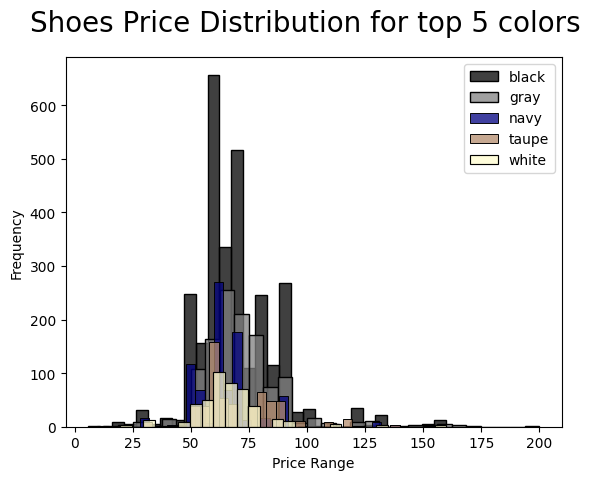

In [132]:
import seaborn as sns

colors = df.color.value_counts().head(5).index
for n in colors:
    sns.histplot(df[(df.color == n)]["prices.amountMax"],bins=30,kde=False,common_bins=True,label=n, color=getValidColor(n))

plt.suptitle('Shoes Price Distribution for top 5 colors', fontsize = 20)
plt.xlabel("Price Range")
plt.ylabel("Frequency")

plt.legend()

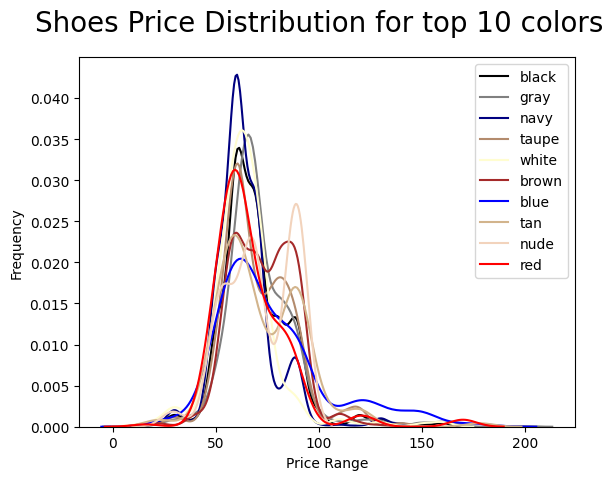

In [135]:
colors =df.color.value_counts().head(10).index
for n in colors:
    sns.kdeplot(df[(df["prices.amountMax"] < 350) & (df.color == n)]["prices.amountMax"], legend=True,label=n, color=getValidColor(n))

plt.suptitle('Shoes Price Distribution for top 10 colors', fontsize = 20)
plt.xlabel("Price Range")
plt.ylabel("Frequency")
plt.legend()

plt.savefig("10_kde_plot.png")

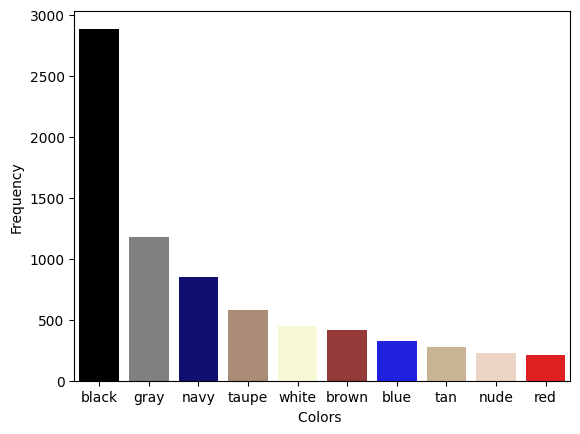

In [137]:
data = df.color.value_counts().head(10)

sns.barplot(x=data.index, y=data.values, palette=[getValidColor(n) for n in data.index])
plt.xlabel("Colors ")
plt.ylabel("Frequency")

plt.savefig("10_color_frequency.png")

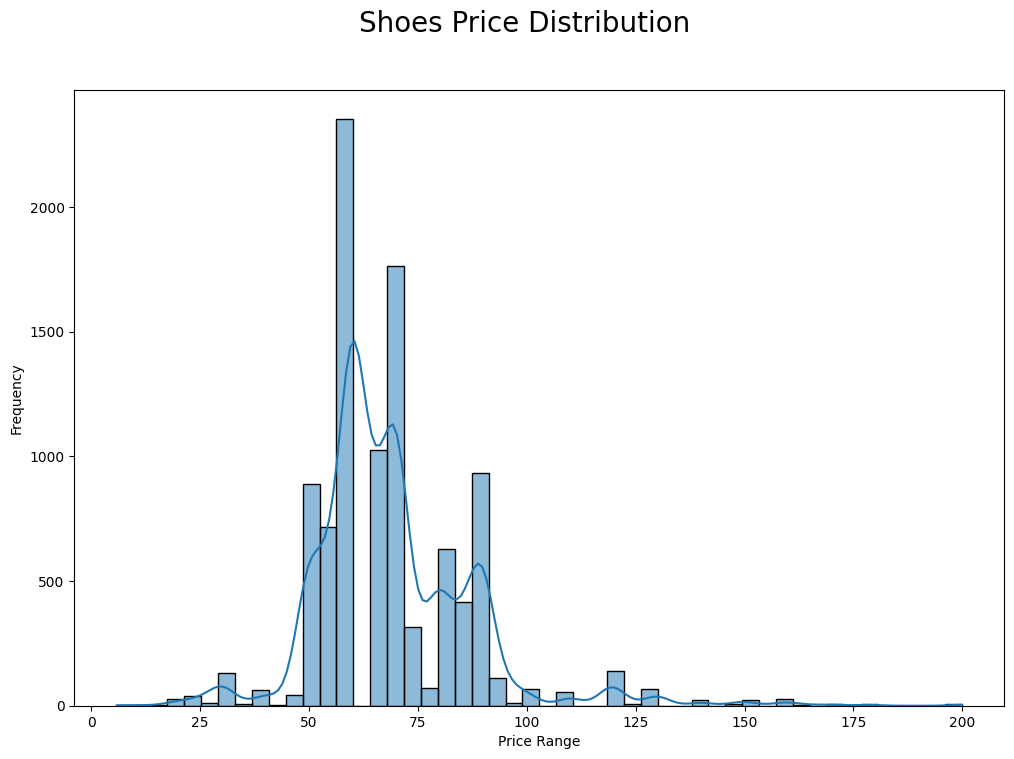

In [141]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.histplot(x = df['prices.amountMax'], kde=True, bins=50)
plt.suptitle('Shoes Price Distribution', fontsize = 20)
plt.xlabel("Price Range")
plt.ylabel("Frequency")
plt.savefig("distrubtion.png")
plt.show()

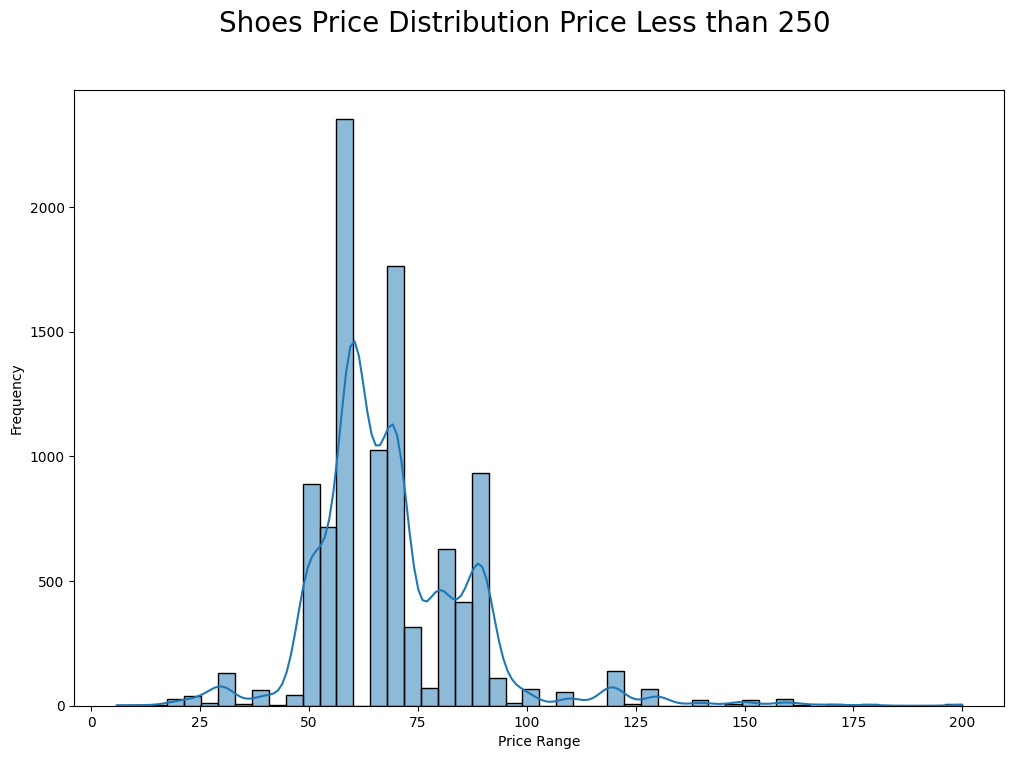

In [27]:
fig, ax = plt.subplots(figsize = (12, 8))

sns.histplot(x = df[(df["prices.amountMax"] < 250)]["prices.amountMax"], kde=True, bins=50)
plt.suptitle('Shoes Price Distribution Price Less than 250', fontsize = 20)
plt.xlabel("Price Range")
plt.ylabel("Frequency")

plt.show()

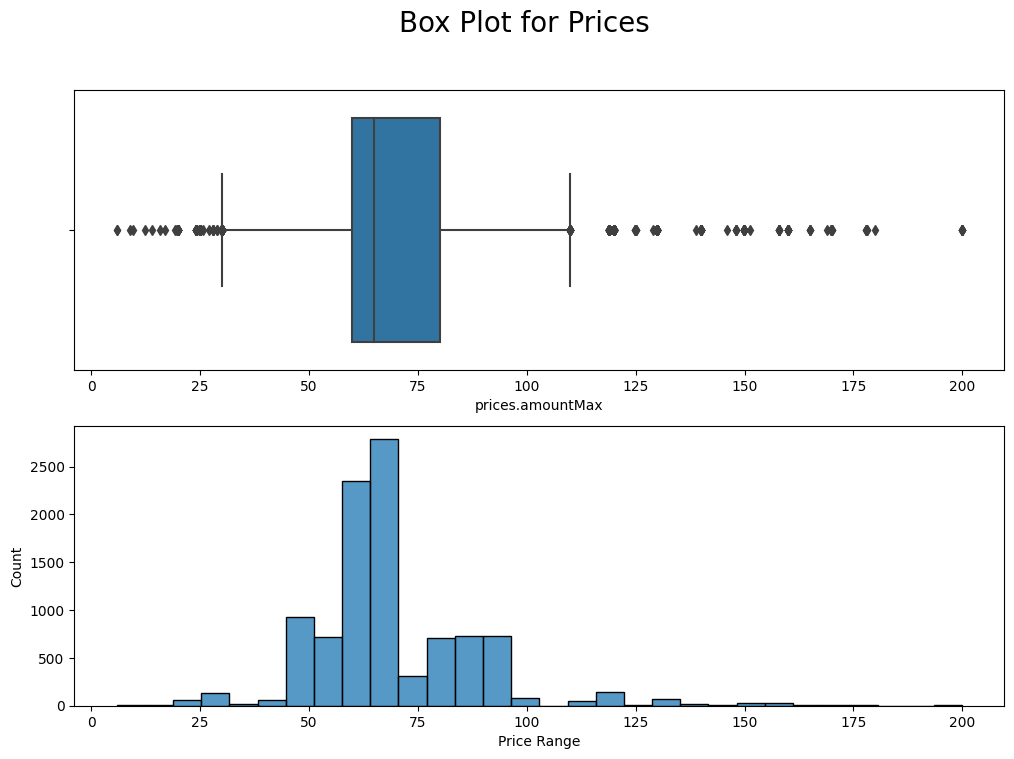

In [28]:
fig, ax = plt.subplots(2,1,figsize = (12, 8))

sns.boxplot(x = df["prices.amountMax"], ax = ax[0])
sns.histplot(x = df["prices.amountMax"], ax = ax[1], bins=30)
plt.suptitle('Box Plot for Prices', fontsize = 20)
plt.xlabel("Price Range")

plt.show()

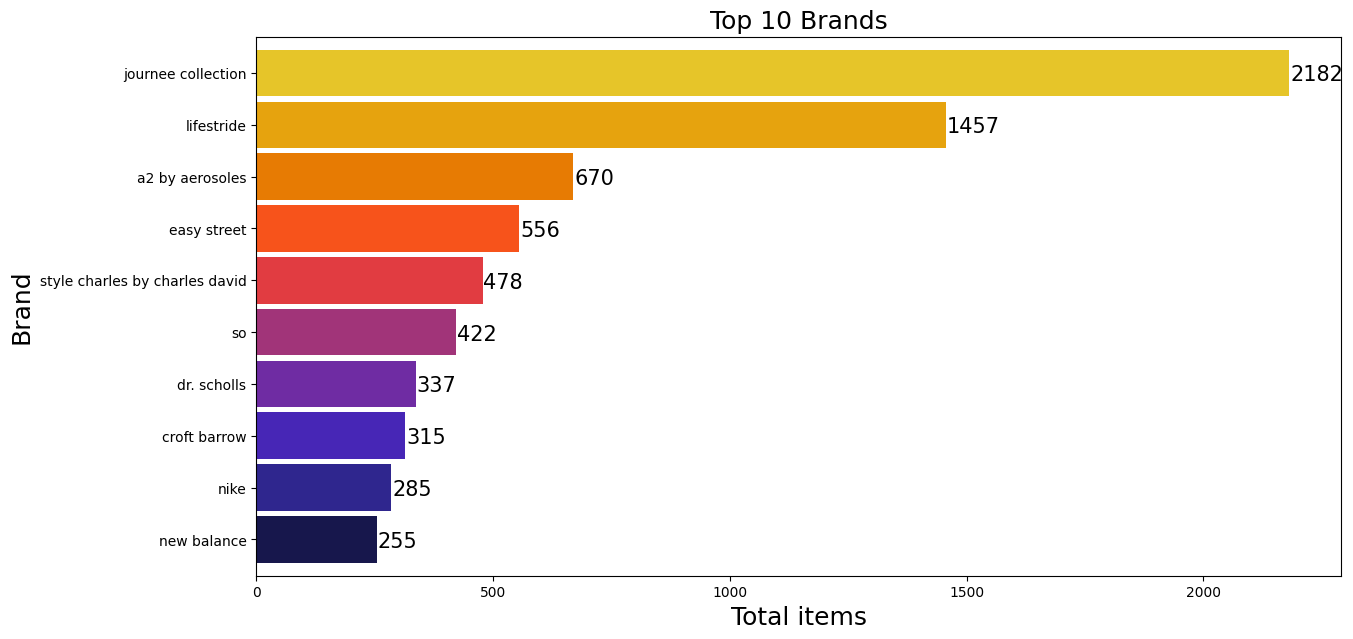

In [29]:
top_brands =df.groupby('brand')['name'].count().reset_index().sort_values('name',ascending=False).head(10).set_index('brand')
plt.subplots(figsize=(14,7))
ax = top_brands['name'].sort_values().plot.barh(width=0.9,color=sns.color_palette('CMRmap',12))
ax.set_xlabel("Total items", fontsize=18)
ax.set_ylabel("Brand", fontsize=18)
ax.set_title("Top 10 Brands",fontsize=18,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+.3,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

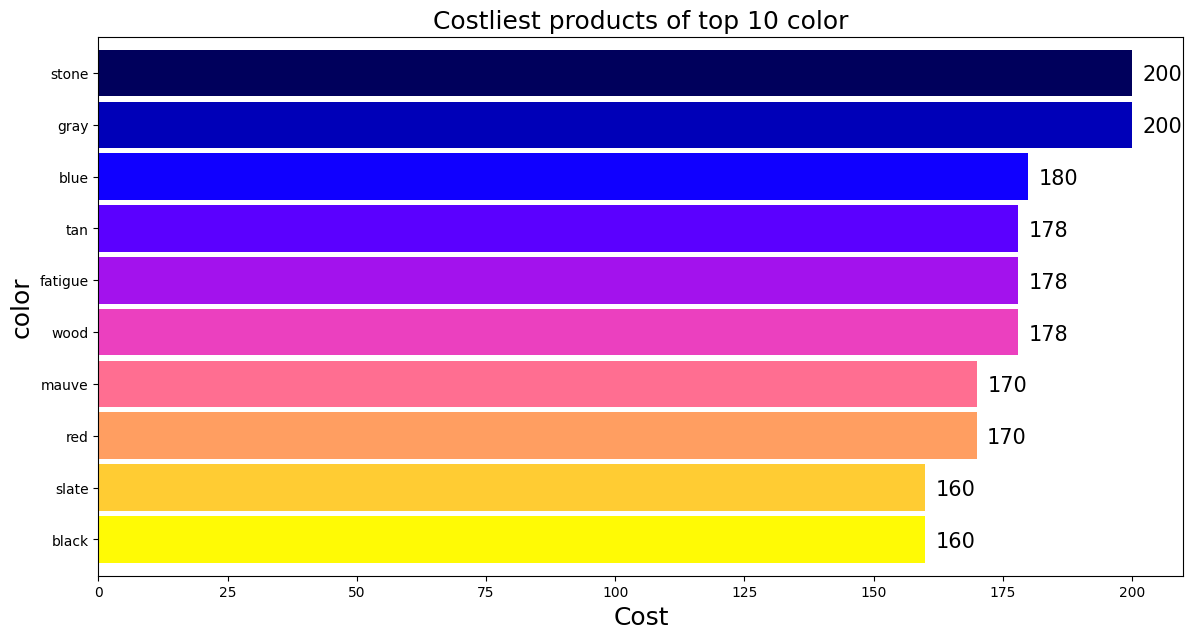

In [142]:
df =df.sort_values('prices.amountMax',ascending=False)
costliest_products =df.groupby('color')['prices.amountMax'].first().reset_index().sort_values('prices.amountMax',ascending=False).head(10).set_index('color')
plt.subplots(figsize=(14,7))
ax = costliest_products['prices.amountMax'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gnuplot2_r',10))
ax.set_xlabel("Cost", fontsize=18)
ax.set_ylabel("color", fontsize=18)
ax.set_title("Costliest products of top 10 color",fontsize=18,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+.3,str(round(i.get_width())), fontsize=15,color='black')
plt.savefig("costliest_producsts.png")
plt.show()

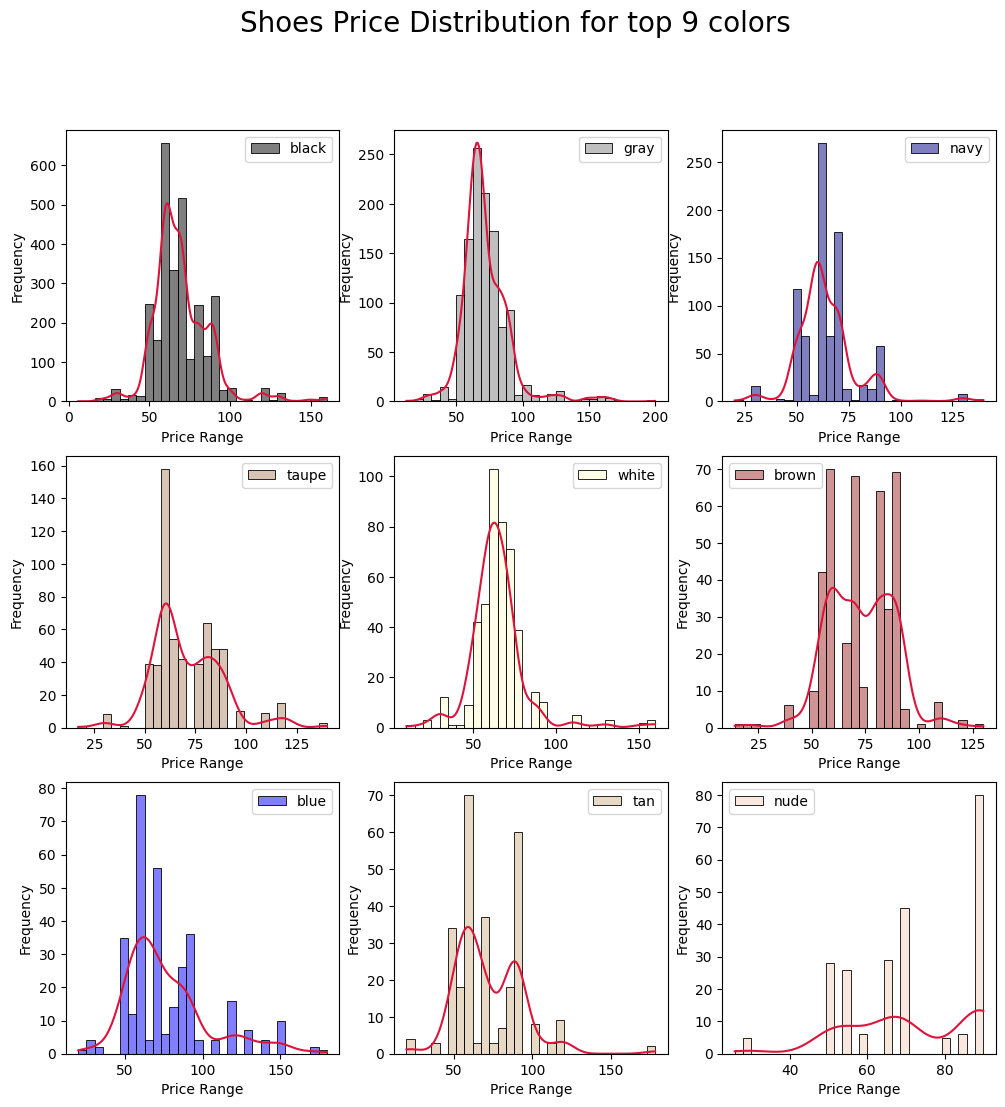

In [144]:
import seaborn as sns
import math

fig, ax = plt.subplots(3, 3,figsize=(12,12))



colors = df.color.value_counts().head(9).index
for idx, n in enumerate(colors):
    _ax = ax[math.floor(idx/3)][idx%3]
    sns.histplot(df[(df["prices.amountMax"] < 350) & (df.color == n)]["prices.amountMax"],bins=30,kde=True,common_bins=True,label=n, ax = _ax, color=getValidColor(n))
    _ax.set_xlabel("Price Range")
    _ax.set_ylabel("Frequency")
    _ax.legend()
    _ax.lines[0].set_color('crimson')
    

plt.suptitle('Shoes Price Distribution for top 9 colors', fontsize = 20)

plt.savefig("distribution_hist.png")
plt.legend()

Text(0.5, 0.98, 'Brand Price Distribution for top 9 colors')

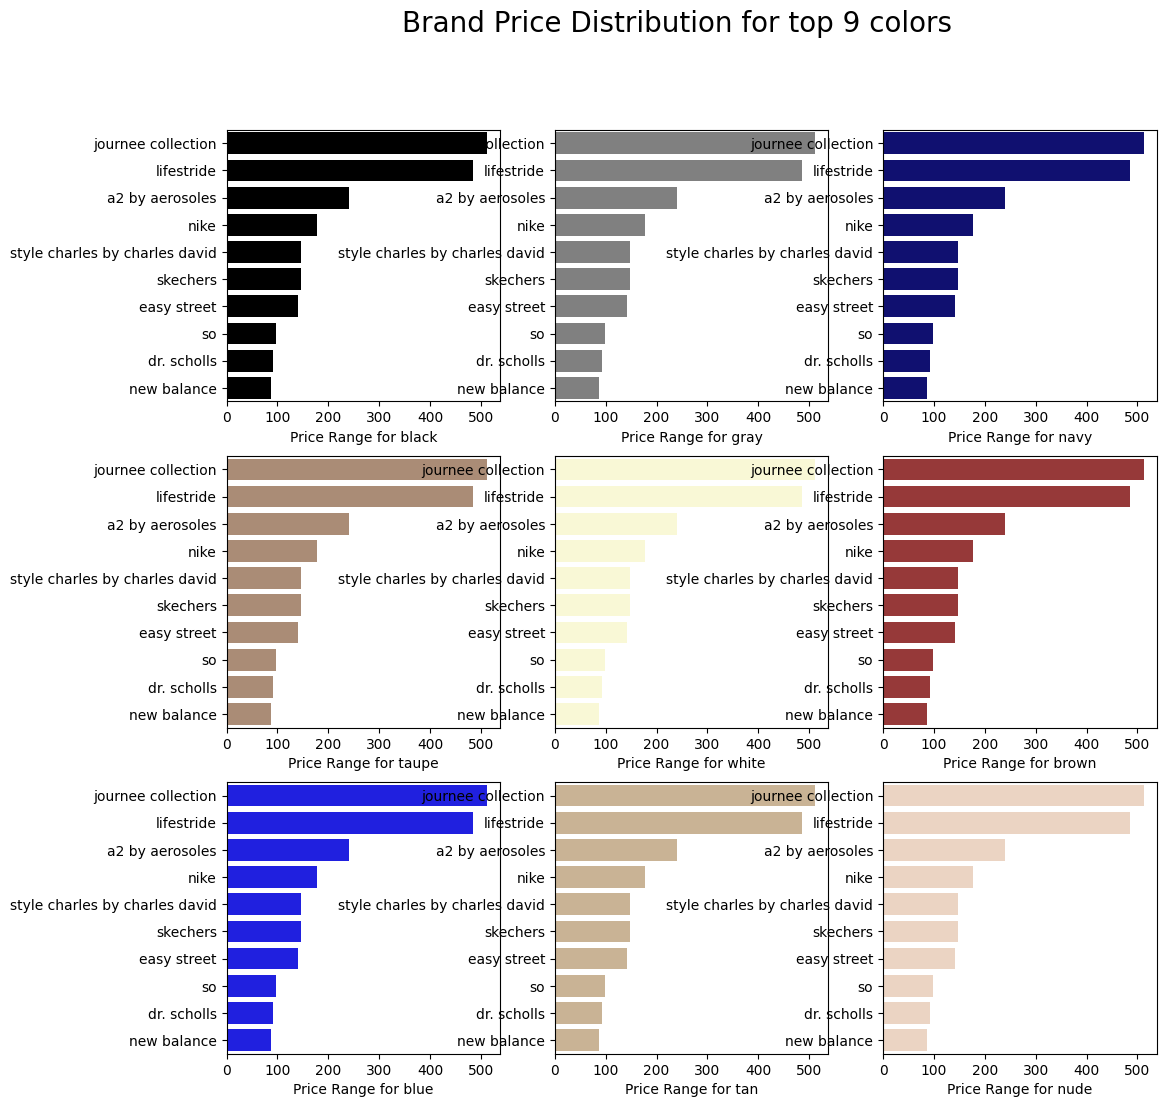

In [145]:
import seaborn as sns
import math

fig, ax = plt.subplots(3, 3,figsize=(12,12))



colors = df.color.value_counts().head(9).index
for idx, n in enumerate(colors):
    _ax = ax[math.floor(idx/3)][idx%3]
    data = df[df.color=="black"]["brand"].value_counts().head(10)
    sns.barplot(x=data.values, y=data.index, ax = _ax, color=getValidColor(n),orient='h')
    _ax.set_xlabel("Price Range for "+n)
    #_ax.set_ylabel("Frequency")
    #_ax.legend()
    
plt.savefig("brand_color.png")
plt.suptitle('Brand Price Distribution for top 9 colors', fontsize = 20)


In [34]:
data = df[df.color=="black"]["brand"].value_counts().head(10)

In [35]:
df["name"].value_counts()

Nike Flex Experience 6 Women's Running Shoes                       185
LifeStride Lively Women's High Heels                               157
Dr. Scholl's Madison Women's Sneakers                              144
Simply Vera Vera Wang Women's All-Over Stretch Heels               121
Dr. Scholl's Jorie Women's Ankle Boots                             109
                                                                  ... 
Carrini CA Collection Women's Fashion Buckle Pocket Boots            1
UGG Renada Shoe - Women's                                            1
SeaVees Huntington Middie Shoe - Women's                             1
Brinley Co. Womens Faux Leather Stacked Heel Fringe Ankle Boots      1
Womens IB Tornado Boots                                              1
Name: name, Length: 647, dtype: int64

In [36]:
from collections import Counter
common = Counter(" ".join(df["name"].str.lower()).split()).most_common(100)

In [37]:
!pip install wordcloud

/bin/bash: /home/azim/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 6.6 MB/s eta 0:00:00m eta 0:00:010:01


In [38]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

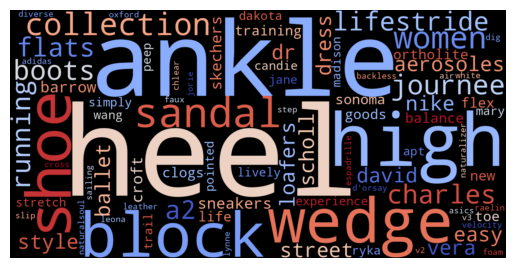

In [39]:
wordcloud = WordCloud(colormap="coolwarm_r", width=1600, height=800).generate(" ".join([n[0] for n in common]))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("wordcloud.png")

In [40]:
df['prices.size'].isnull().sum()

0

In [41]:
df['prices.size'].unique()

array(['9', '8.5', '7', '11', '6', '8', '6.5', '10', '39', '37', '9.5',
       'US 9.5/UK 8.0', 'US 9.0/UK 7.5', 'US 8.5/UK 7.0', '38.5', '39.5',
       '36', '40.5', '42', '10.5', 'US 6.5/UK 5.0', 'US 7.5/UK 6.0', 'S',
       'US 10.5/UK 9.0', '7.5', 'US 10.0/UK 8.5', 'US 8.0/UK 6.5', '40',
       '41', '9 WIDE', '7 MED', '11 MED', '9.5 MED', '7.5 WIDE', '41.5',
       'US 11.0/UK 9.5', 'US 7.0/UK 5.5', 'US 6.0/UK 4.5', '40 WIDE',
       '8.5 MED', '9 MED', '6 MED', '8 MED', '6.5 MED', '10 MED', '5',
       '38 WIDE', '36 WIDE', '7.5 MED', '41 WIDE', '5 MED', '8 WIDE',
       '6 WIDE', '7 WIDE', '11 WIDE', '8.5 WIDE', '9.5 WIDE', '12',
       '12 MED', '10 WIDE', '6.5 WIDE', '5.5 MED', '10.5 MED', '5.5',
       '35', '12 WIDE', '10.5 WIDE', '38', 'Mens 5.5/Womens 7.0',
       '11.5 WIDE', '11.5', '5 WIDE', '5.5 WIDE', 'Mens 7.5/Womens 9.0',
       'Mens 8.5/Womens 10.0', 'Mens 6.0/Womens 7.5',
       'Mens 7.0/Womens 8.5', 'Mens 4.5/Womens 6.0', 'Medium', '4',
       'SMALL', 'MEDIUM'

In [42]:
#check unique data 
df['prices.size'] = df['prices.size'].str.lower()
df['prices.size'].unique()

array(['9', '8.5', '7', '11', '6', '8', '6.5', '10', '39', '37', '9.5',
       'us 9.5/uk 8.0', 'us 9.0/uk 7.5', 'us 8.5/uk 7.0', '38.5', '39.5',
       '36', '40.5', '42', '10.5', 'us 6.5/uk 5.0', 'us 7.5/uk 6.0', 's',
       'us 10.5/uk 9.0', '7.5', 'us 10.0/uk 8.5', 'us 8.0/uk 6.5', '40',
       '41', '9 wide', '7 med', '11 med', '9.5 med', '7.5 wide', '41.5',
       'us 11.0/uk 9.5', 'us 7.0/uk 5.5', 'us 6.0/uk 4.5', '40 wide',
       '8.5 med', '9 med', '6 med', '8 med', '6.5 med', '10 med', '5',
       '38 wide', '36 wide', '7.5 med', '41 wide', '5 med', '8 wide',
       '6 wide', '7 wide', '11 wide', '8.5 wide', '9.5 wide', '12',
       '12 med', '10 wide', '6.5 wide', '5.5 med', '10.5 med', '5.5',
       '35', '12 wide', '10.5 wide', '38', 'mens 5.5/womens 7.0',
       '11.5 wide', '11.5', '5 wide', '5.5 wide', 'mens 7.5/womens 9.0',
       'mens 8.5/womens 10.0', 'mens 6.0/womens 7.5',
       'mens 7.0/womens 8.5', 'mens 4.5/womens 6.0', 'medium', '4',
       'small', 'large']

In [43]:
# address the incosistency in data

import re

#keep us size only

def extract_us_size(size):
    match_us = re.match(r'^us\s+(\d+(?:\.\d+)?)', size)
    if match_us:
        return match_us.group(1)
    return size

#keep womens size only

def extract_womens_size(size):
    match_womens = re.search(r'womens\s+(\d+(?:\.\d+)?)', size)
    if match_womens:
        return match_womens.group(1)
    return size

#keep size before med/wide

def extract_number_before_med_or_wide(size):
    match_med_or_wide = re.search(r'(\d+(?:\.\d+)?)\s+(?:med|wide)', size)
    if match_med_or_wide:
        return match_med_or_wide.group(1)
    return size

#replace s/small/medium/large with a number

def replace_values(value):
    replacements = {
        's': '5',
        'small': '5',
        'medium': '6',
        'large': '7'
    }
    return replacements.get(value, value)

# Apply the functions to the 'prices.size' column
df['prices.size']= df['prices.size'].apply(extract_us_size)
df['prices.size'] =df['prices.size'].apply(extract_womens_size)
df['prices.size']= df['prices.size'].apply(extract_number_before_med_or_wide)
df['prices.size'] = df['prices.size'].apply(replace_values)

print(df['prices.size'].unique())

['9' '8.5' '7' '11' '6' '8' '6.5' '10' '39' '37' '9.5' '9.0' '38.5' '39.5'
 '36' '40.5' '42' '10.5' '7.5' '5' '10.0' '8.0' '40' '41' '41.5' '11.0'
 '7.0' '6.0' '38' '12' '5.5' '35' '11.5' '4']


In [44]:
# change all values to numeric

df['prices.size'] = pd.to_numeric(df['prices.size'], errors='coerce')

print(df['prices.size'].unique())

print(df['prices.size'].max())

[ 9.   8.5  7.  11.   6.   8.   6.5 10.  39.  37.   9.5 38.5 39.5 36.
 40.5 42.  10.5  7.5  5.  40.  41.  41.5 38.  12.   5.5 35.  11.5  4. ]
42.0


In [45]:
import pandas as pd

import numpy as np

n=df['prices.size']

# Conversion table: EU sizes mapped to corresponding US sizes
to_us_sizes = {
    '34': 4,
    '34.5': 4.5,
    '35': 5,
    '35.5': 5.5,
    '36': 6,
    '36.5': 6,
    '37': 6.5,
    '37.5': 7,
    '38': 7.5,
    '38.5': 7.5,
    '39': 8,
    '39.5': 8.5,
    '40': 9,
    '40.5': 9.5,
    '41': 9.5,
    '41.5': 10,
    '42': 10.5
}

def convert_to_us(n):
    if n < 34:
        return n
    else:
        keys = sorted(to_us_sizes.keys(), key=float, reverse=True)

        for key in keys:
            if float(key) <= n:
                return to_us_sizes[key]

        return n  
    
df['prices.size'] = df['prices.size'].apply(convert_to_us)

print(df['prices.size'].unique())

[ 9.   8.5  7.  11.   6.   8.   6.5 10.   9.5  7.5 10.5  5.  12.   5.5
 11.5  4. ]


In [46]:
sizes = df['prices.size'].value_counts()

<AxesSubplot:>

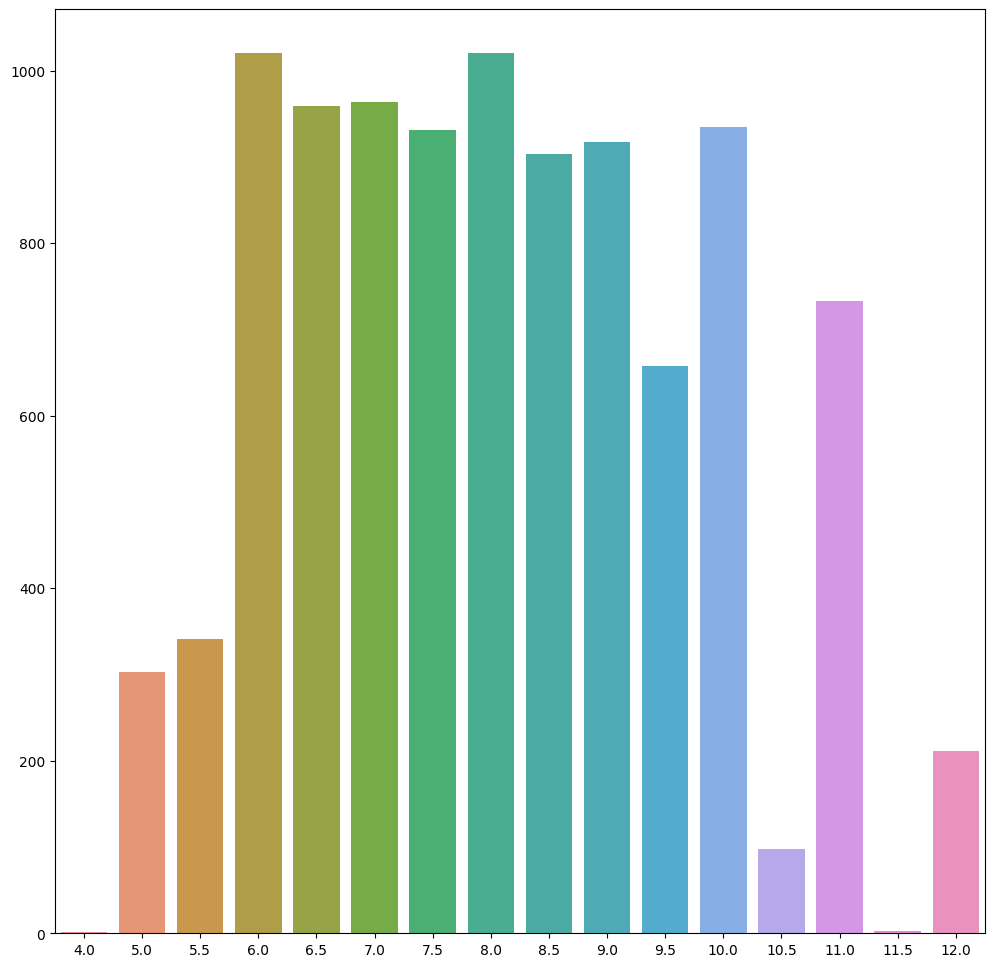

In [47]:
fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(x=sizes.index,y= sizes.values, ax=ax)

In [48]:
#https://www.viakix.com/blogs/news/average-womens-shoe-size

<AxesSubplot:xlabel='prices.size', ylabel='prices.amountMax'>

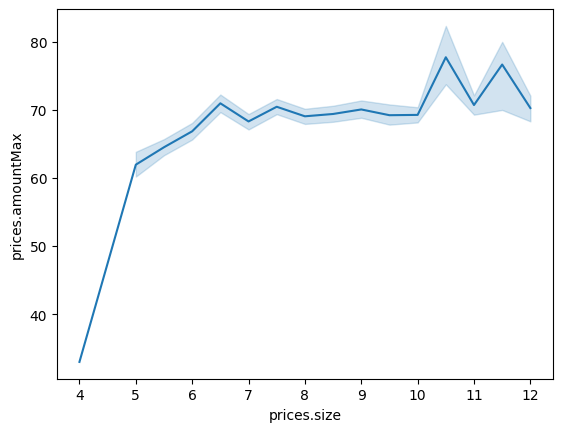

In [49]:
sns.lineplot(data=df, x="prices.size", y="prices.amountMax")

In [50]:
df['prices.merchant'] = df['prices.merchant'].str.lower()
df["avgprice"] = (df["prices.amountMax"] + df["prices.amountMin"])/2
df["discount"] = ((df["prices.amountMin"] - df["prices.amountMax"])/df["prices.amountMax"])*-100

In [51]:
df.brand = df.brand.str.lower()

In [52]:
df.brand.value_counts()

journee collection                2182
lifestride                        1593
a2 by aerosoles                    670
easy street                        585
style charles by charles david     478
                                  ... 
sloggers                             1
dr. scholl's                         1
carrini                              1
soft ones                            1
unique bargains                      1
Name: brand, Length: 115, dtype: int64

In [53]:
df[df.brand == "easy street"]

,id,dateAdded,dateUpdated,asins,brand,categories,primaryCategories,colors,dimension,ean,...,prices.shipping,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,weight,color,avgprice,discount
9354,AV_MZV83uC1rwyj_hSSZ,2017-11-17T21:48:24Z,2018-02-01T07:33:00Z,NaN,easy street,"Womens,Shoes,Pumps,Heels,Easy Street",Shoes,Silver,NaN,NaN,...,NaN,12.0,https://www.kohls.com/product/prd-2792264/easy...,"5 MED,5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8 ME...",https://www.kohls.com/product/prd-2792264/easy...,"889885219949,889885219499,889885219956,8898852...",NaN,silver,50.615,31.255209
9346,AV_MZV83uC1rwyj_hSSZ,2017-11-17T21:48:24Z,2018-02-01T07:33:00Z,NaN,easy street,"Womens,Shoes,Pumps,Heels,Easy Street",Shoes,Silver,NaN,NaN,...,NaN,7.5,https://www.kohls.com/product/prd-2792264/easy...,"5 MED,5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8 ME...",https://www.kohls.com/product/prd-2792264/easy...,"889885219949,889885219499,889885219956,8898852...",NaN,silver,51.240,29.171529
9347,AV_MZV83uC1rwyj_hSSZ,2017-11-17T21:48:24Z,2018-02-01T07:33:00Z,NaN,easy street,"Womens,Shoes,Pumps,Heels,Easy Street",Shoes,Silver,NaN,NaN,...,NaN,9.0,https://www.kohls.com/product/prd-2792264/easy...,"5 MED,5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8 ME...",https://www.kohls.com/product/prd-2792264/easy...,"889885219949,889885219499,889885219956,8898852...",NaN,silver,59.990,-0.000000
9348,AV_MZV83uC1rwyj_hSSZ,2017-11-17T21:48:24Z,2018-02-01T07:33:00Z,NaN,easy street,"Womens,Shoes,Pumps,Heels,Easy Street",Shoes,Gold,NaN,NaN,...,NaN,9.5,https://www.kohls.com/product/prd-2792264/easy...,"5 MED,5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8 ME...",https://www.kohls.com/product/prd-2792264/easy...,"889885219949,889885219499,889885219956,8898852...",NaN,gold,51.240,29.171529
9349,AV_MZV83uC1rwyj_hSSZ,2017-11-17T21:48:24Z,2018-02-01T07:33:00Z,NaN,easy street,"Womens,Shoes,Pumps,Heels,Easy Street",Shoes,Silver,NaN,NaN,...,NaN,9.0,https://www.kohls.com/product/prd-2792264/easy...,"5 MED,5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8 ME...",https://www.kohls.com/product/prd-2792264/easy...,"889885219949,889885219499,889885219956,8898852...",NaN,silver,59.990,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8313,AVph-tAAilAPnD_x_Z9g,2017-01-17T19:08:45Z,2018-01-30T02:10:34Z,NaN,easy street,"Womens,Shoes,Clogs,Mules,Easy Street,Women's S...",Shoes,"Navy,Brown Polyurethane,Black Tool Polyurethan...",NaN,8.860660e+11,...,NaN,6.5,https://www.kohls.com/product/prd-2594065/easy...,"5 MED,5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8 ME...",https://www.kohls.com/product/prd-2594065/easy...,"886065942956,886065942055,886065942512,8860659...",NaN,black,49.990,-0.000000
8312,AVph-tAAilAPnD_x_Z9g,2017-01-17T19:08:45Z,2018-01-30T02:10:34Z,NaN,easy street,"Womens,Shoes,Clogs,Mules,Easy Street,Women's S...",Shoes,"Navy,Brown Polyurethane,Black Tool Polyurethan...",NaN,8.860660e+11,...,NaN,7.0,https://www.kohls.com/product/prd-2594065/easy...,"5 MED,5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8 ME...",https://www.kohls.com/product/prd-2594065/easy...,"886065942956,886065942055,886065942512,8860659...",NaN,black,49.990,-0.000000
8311,AVph-tAAilAPnD_x_Z9g,2017-01-17T19:08:45Z,2018-01-30T02:10:34Z,NaN,easy street,"Womens,Shoes,Clogs,Mules,Easy Street,Women's S...",Shoes,"Navy,Brown Polyurethane,Black Tool Polyurethan...",NaN,8.860660e+11,...,NaN,5.0,https://www.kohls.com/product/prd-2594065/easy...,"5 MED,5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8 ME...",https://www.kohls.com/product/prd-2594065/easy...,"886065942956,886065942055,886065942512,8860659...",NaN,navy,49.990,-0.000000
8310,AVph-tAAilAPnD_x_Z9g,2017-01-17T19:08:45Z,2018-01-30T02:10:34Z,NaN,easy street,"Womens,Shoes,Clogs,Mules,Easy Street,Women's S...",Shoes,"Navy,Brown Polyurethane,Black Tool Polyurethan...",NaN,8.860660e+11,...,NaN,8.0,https://www.kohls.com/product/prd-2594065/easy...,"5 MED,5.5 MED,6 MED,6.5 MED,7 MED,7.5 MED,8 ME...",https://www.kohls.com/product/prd-2594065/easy...,"886065942956,886065942055,886065942512,8860659..

<AxesSubplot:xlabel='prices.size', ylabel='avgprice'>

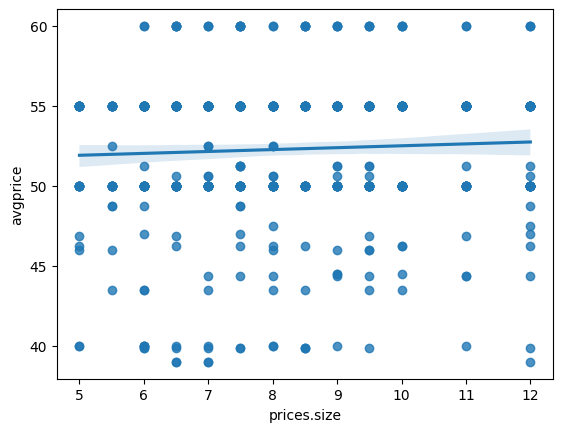

In [54]:
sns.regplot(data=df[df.brand == "easy street"], x="prices.size",y="avgprice")

In [55]:
df.brand.value_counts().head(5).index

Index(['journee collection', 'lifestride', 'a2 by aerosoles', 'easy street',
       'style charles by charles david'],
      dtype='object')

In [56]:
es = df[df.brand.isin(df.brand.value_counts().head(10).index)]

In [57]:
es.head(1)

,id,dateAdded,dateUpdated,asins,brand,categories,primaryCategories,colors,dimension,ean,...,prices.shipping,prices.size,prices.sourceURLs,sizes,sourceURLs,upc,weight,color,avgprice,discount
9810,AWKcE7YqYSSHbkXwy0XX,2018-04-06T17:33:30Z,2018-04-10T19:27:44Z,NaN,nike,"Women's Footwear,Women's Running Shoes,Women's...",Shoes,"Black/White-Anthracite,Glacier Blue/Metallic S...",NaN,NaN,...,Free 2-Day shipping on orders over $50,10.0,https://www.backcountry.com/nike-lunarepic-low...,"6.0,7.0,7.5,8.0,8.5,9.0,9.5,10.0,11.0",https://www.backcountry.com/nike-lunarepic-low...,NaN,7.3 oz,black,127.96,40.0


In [58]:
es.groupby(["brand"])["avgprice"].mean()

brand
a2 by aerosoles                   62.286866
croft barrow                      50.172524
dr. scholls                       66.297804
easy street                       52.286368
journee collection                61.831748
lifestride                        52.113258
nike                              67.904526
skechers                          61.190610
so                                42.964514
style charles by charles david    74.618054
Name: avgprice, dtype: float64

In [59]:
df['categories'] = df['categories'].str.split(',')

df['categories'] = df['categories'].apply(lambda x: [i.lower() for i in x])
df['categories'] = df['categories'].apply(lambda x: [i.replace('\'', '') for i in x])
df['categories'] = df['categories'].apply(lambda x: [i.replace('womens ', '') for i in x])

df['categories'] = df['categories'].apply(lambda x: 'Dress Shoes' if 'red' in x else x)
df['categories'] = df['categories'].apply(lambda x: 'Boots' if 'boots' in x else x)
df['categories'] = df['categories'].apply(lambda x: 'Heels and Pumps' if ('heels' in x) or ('pumps' in x) else x)
df['categories'] = df['categories'].apply(lambda x: 'Sandals' if 'sandals' in x else x)
df['categories'] = df['categories'].apply(lambda x: 'Clogs and Mules' if ('clogs' in x) or ('mules' in x) else x)
df['categories'] = df['categories'].apply(lambda x: 'Loafers' if 'loafers' in x else x)
df['categories'] = df['categories'].apply(lambda x: 'Flats' if 'flats' in x else x)
df['categories'] = df['categories'].apply(lambda x: 'Athletic Shoes' if ('athletic shoes' in x) or ('running shoes' in x) else x)
df['categories'] = df['categories'].apply(lambda x: 'Other' if isinstance(x, list) else x)

In [60]:
df['categories'].value_counts().head(50)

Boots              2341
Heels and Pumps    1936
Athletic Shoes     1779
Sandals            1721
Flats              1165
Clogs and Mules     476
Loafers             320
Other               257
Name: categories, dtype: int64

In [61]:
gr = df.groupby("categories")["avgprice"]

In [62]:
gr.mean()

categories
Athletic Shoes     70.853111
Boots              66.131254
Clogs and Mules    56.159139
Flats              48.792408
Heels and Pumps    55.591565
Loafers            59.422781
Other              72.458074
Sandals            52.496150
Name: avgprice, dtype: float64

In [63]:
gr.min()

categories
Athletic Shoes     37.490
Boots              31.935
Clogs and Mules    32.490
Flats              24.365
Heels and Pumps    35.615
Loafers            42.740
Other               5.375
Sandals            14.865
Name: avgprice, dtype: float64

In [64]:
gr.max()

categories
Athletic Shoes     179.95
Boots              145.95
Clogs and Mules     79.99
Flats               89.99
Heels and Pumps    130.00
Loafers             90.00
Other              178.00
Sandals            125.00
Name: avgprice, dtype: float64

<AxesSubplot:xlabel='avgprice', ylabel='categories'>

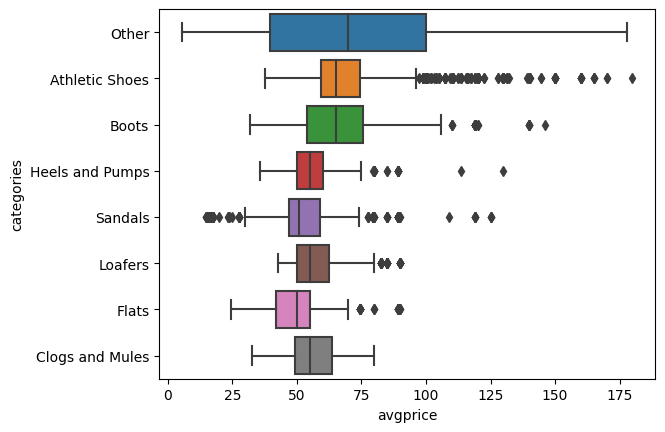

In [65]:
sns.boxplot(df,x="avgprice",y="categories")

In [66]:
df[df["avgprice"] > 250].T

""
id
dateAdded
dateUpdated
asins
brand
categories
primaryCategories
colors
dimension
ean


In [67]:
df.corr()

,ean,prices.amountMax,prices.amountMin,prices.isSale,prices.returnPolicy,prices.size,avgprice,discount
ean,1.000000,-0.001929,0.043401,-0.329100,NaN,0.137289,0.023261,-0.093448
prices.amountMax,-0.001929,1.000000,0.666104,0.265893,NaN,0.065776,0.904294,0.043298
prices.amountMin,0.043401,0.666104,1.000000,0.096907,NaN,0.069813,0.920768,-0.688779
prices.isSale,-0.329100,0.265893,0.096907,1.000000,NaN,-0.029170,0.194538,0.053770
prices.returnPolicy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prices.size,0.137289,0.065776,0.069813,-0.029170,NaN,1.000000,0.074362,-0.035716
avgprice,0.023261,0.904294,0.920768,0.194538,NaN,0.074362,1.000000,-0.371591
discount,-0.093448,0.043298,-0.688779,0.053770,NaN,-0.035716,-0.371591,1.000000


In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
leColor = LabelEncoder().fit(df.color)

In [70]:
df["leColor"] = leColor.transform(df.color)

In [71]:
df[df.color.isin(df.color.value_counts().head(5).index)].corr()

,ean,prices.amountMax,prices.amountMin,prices.isSale,prices.returnPolicy,prices.size,avgprice,discount,leColor
ean,1.000000,0.063895,0.042789,-0.318034,NaN,0.054453,0.062489,-0.029211,0.119104
prices.amountMax,0.063895,1.000000,0.655382,0.273908,NaN,0.075882,0.898063,0.047908,-0.062199
prices.amountMin,0.042789,0.655382,1.000000,0.089943,NaN,0.073442,0.920804,-0.698962,-0.039777
prices.isSale,-0.318034,0.273908,0.089943,1.000000,NaN,-0.018088,0.193823,0.066223,-0.001150
prices.returnPolicy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prices.size,0.054453,0.075882,0.073442,-0.018088,NaN,1.000000,0.081955,-0.031655,0.019875
avgprice,0.062489,0.898063,0.920804,0.193823,NaN,0.081955,1.000000,-0.382318,-0.055284
discount,-0.029211,0.047908,-0.698962,0.066223,NaN,-0.031655,-0.382318,1.000000,-0.008597
leColor,0.119104,-0.062199,-0.039777,-0.001150,NaN,0.019875,-0.055284,-0.008597,1.000000


In [72]:
leCategory = LabelEncoder().fit(df.categories)

In [73]:
df["dfCategory"] = leCategory.transform(df.categories)

In [74]:
df.corr()

,ean,prices.amountMax,prices.amountMin,prices.isSale,prices.returnPolicy,prices.size,avgprice,discount,leColor,dfCategory
ean,1.000000,-0.001929,0.043401,-0.329100,NaN,0.137289,0.023261,-0.093448,0.143279,0.014086
prices.amountMax,-0.001929,1.000000,0.666104,0.265893,NaN,0.065776,0.904294,0.043298,-0.038582,-0.357686
prices.amountMin,0.043401,0.666104,1.000000,0.096907,NaN,0.069813,0.920768,-0.688779,-0.048258,-0.226669
prices.isSale,-0.329100,0.265893,0.096907,1.000000,NaN,-0.029170,0.194538,0.053770,-0.019021,-0.018967
prices.returnPolicy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prices.size,0.137289,0.065776,0.069813,-0.029170,NaN,1.000000,0.074362,-0.035716,0.003203,-0.040989
avgprice,0.023261,0.904294,0.920768,0.194538,NaN,0.074362,1.000000,-0.371591,-0.047802,-0.316822
discount,-0.093448,0.043298,-0.688779,0.053770,NaN,-0.035716,-0.371591,1.000000,0.023846,-0.027039
leColor,0.143279,-0.038582,-0.048258,-0.019021,NaN,0.003203,-0.047802,0.023846,1.000000,0.061600
dfCategory,0.014086,-0.357686,-0.226669,-0.018967,NaN,-0.040989,-0.316822,-0.027039,0.061600,1.000000


In [75]:
#fig, ax = plt.subplots(figsize=(12,12))
gb = df.groupby('categories')["prices.amountMax"].agg(['min','mean','median','max'])

In [76]:
gb.index

Index(['Athletic Shoes', 'Boots', 'Clogs and Mules', 'Flats',
       'Heels and Pumps', 'Loafers', 'Other', 'Sandals'],
      dtype='object', name='categories')

<AxesSubplot:xlabel='categories'>

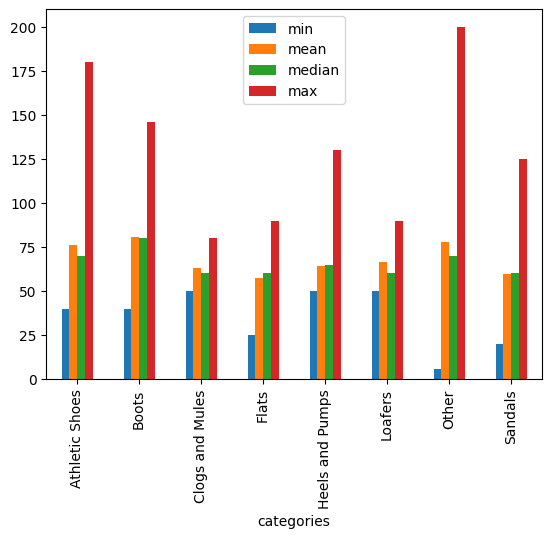

In [77]:
gb.plot.bar()

In [78]:
def _mapper(x):
    if(x < 50):
        return 1
    elif (x <100):
        return 2
    elif (x <150):
        return 3
    elif (x < 200):
        return 4
    else:
        return 5

In [79]:
df["bins"] = df["prices.amountMax"].apply(_mapper)

In [80]:
df.corr()

,ean,prices.amountMax,prices.amountMin,prices.isSale,prices.returnPolicy,prices.size,avgprice,discount,leColor,dfCategory,bins
ean,1.000000,-0.001929,0.043401,-0.329100,NaN,0.137289,0.023261,-0.093448,0.143279,0.014086,0.052744
prices.amountMax,-0.001929,1.000000,0.666104,0.265893,NaN,0.065776,0.904294,0.043298,-0.038582,-0.357686,0.748514
prices.amountMin,0.043401,0.666104,1.000000,0.096907,NaN,0.069813,0.920768,-0.688779,-0.048258,-0.226669,0.512564
prices.isSale,-0.329100,0.265893,0.096907,1.000000,NaN,-0.029170,0.194538,0.053770,-0.019021,-0.018967,0.206003
prices.returnPolicy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prices.size,0.137289,0.065776,0.069813,-0.029170,NaN,1.000000,0.074362,-0.035716,0.003203,-0.040989,0.049923
avgprice,0.023261,0.904294,0.920768,0.194538,NaN,0.074362,1.000000,-0.371591,-0.047802,-0.316822,0.684877
discount,-0.093448,0.043298,-0.688779,0.053770,NaN,-0.035716,-0.371591,1.000000,0.023846,-0.027039,0.028352
leColor,0.143279,-0.038582,-0.048258,-0.019021,NaN,0.003203,-0.047802,0.023846,1.000000,0.061600,-0.025184
dfCategory,0.014086,-0.357686,-0.226669,-0.018967,NaN,-0.040989,-0.316822,-0.027039,0.061600,1.000000,-0.243541


<AxesSubplot:xlabel='avgprice', ylabel='discount'>

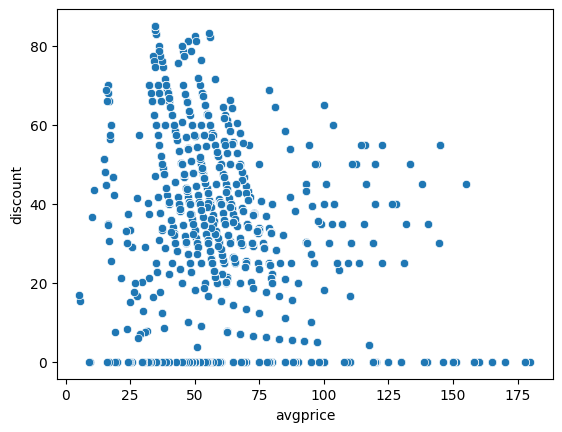

In [81]:
sns.scatterplot(df,x="avgprice",y="discount")

In [82]:
dis = df[df.discount>0]

<AxesSubplot:xlabel='avgprice', ylabel='discount'>

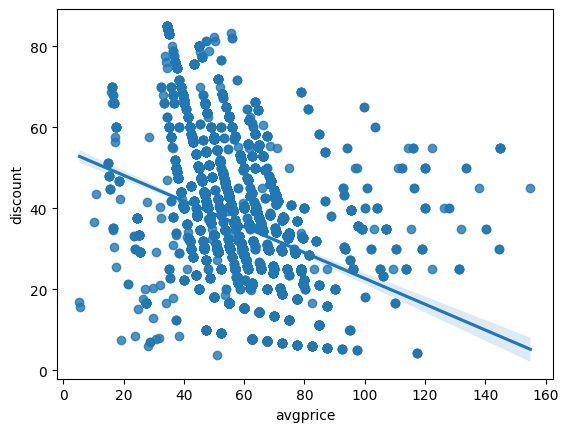

In [83]:
sns.regplot(dis,x="avgprice",y="discount")

<AxesSubplot:xlabel='prices.amountMax', ylabel='discount'>

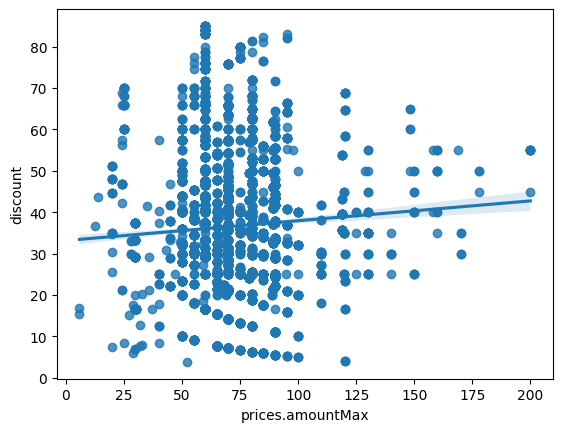

In [84]:
sns.regplot(dis,x="prices.amountMax",y="discount")

In [157]:
from fastai.tabular.all import *

In [165]:
test_df = dis.sample(axis=0,frac=.05)

In [166]:
train_df =  dis.drop(test_df.index)

In [167]:
splits = RandomSplitter(seed=42)(train_df)

dls = TabularPandas(
    train_df, splits=splits,
    procs = [Categorify, FillMissing, Normalize],
    cat_names=["prices.size", "leColor"],
    cont_names=['discount','prices.amountMax'],
    y_names='dfCategory', y_block = CategoryBlock(),
).dataloaders(path=".")

learn = tabular_learner(dls, metrics=accuracy, layers=[64,32,16])

learn.fit(20, lr=0.03)

tst_dl = learn.dls.test_dl(test_df)


epoch,train_loss,valid_loss,accuracy,time
0,1.346604,1.182909,0.581051,00:00
1,1.240246,1.136761,0.578830,00:00
2,1.202859,1.118488,0.585492,00:00
3,1.161252,1.099161,0.585492,00:00
4,1.133275,1.036570,0.635085,00:00
5,1.108269,1.037804,0.627683,00:00
6,1.101760,1.104102,0.607698,00:00
7,1.077412,1.004636,0.633605,00:00
8,1.052007,0.995736,0.635825,00:00
9,1.070430,1.007197,0.623982,00:00


In [180]:
import torch

preds, _ = learn.get_preds(dl=tst_dl)

test_df['_preds'] = preds

def convertTensor(x):
    return leCategory.inverse_transform([torch.argmax(torch.tensor(x))])[0]

test_df['calculatedCategory'] = test_df['_preds'].apply(convertTensor)

In [181]:
test_df[["categories","calculatedCategory"]].head(50)

,categories,calculatedCategory
4983,Boots,Boots
7595,Sandals,Flats
1704,Heels and Pumps,Heels and Pumps
4215,Sandals,Heels and Pumps
8242,Clogs and Mules,Heels and Pumps
3517,Heels and Pumps,Flats
2306,Boots,Boots
6986,Flats,Flats
611,Athletic Shoes,Boots
4901,Loafers,Boots


In [185]:
correct = sum(test_df["categories"] == test_df["calculatedCategory"])
correct

235

In [188]:
size = len(test_df["categories"])

In [189]:
correct/size

0.6601123595505618